## Init stable diffusion

In [1]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, StableDiffusionUpscalePipeline
import torch

def initdiffusionpipeline(model_id):
    # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cuda")
    return pipe

diffusionpipeline=initdiffusionpipeline("stabilityai/stable-diffusion-2-1")


C:\Users\key\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A matching Triton is not available, some optimizations will not be enabled.
Error caught was: No module named 'triton'
text_encoder\model.safetensors not found
C:\Users\key\AppData\Roaming\Python\Python310\site-packages\transformers\models\clip\feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [2]:
def initupscalepipeline(model_id):
    pipeline = StableDiffusionUpscalePipeline.from_pretrained(model_id, torch_dtype=torch.float16)
    pipeline.enable_attention_slicing() 
    pipeline = pipeline.to("cuda")
    return pipeline

upscalepipeline=initupscalepipeline("stabilityai/stable-diffusion-x4-upscaler")

text_encoder\model.safetensors not found


In [3]:
def generateimage(prompt,seed=42):
    generator = torch.Generator("cuda").manual_seed(seed)
    image = diffusionpipeline(prompt,generator=generator).images[0]
    fname = f"images/{prompt.replace(' ','-')}.png"
    image.save(fname)
    display(image)
    return image

## Init LLM

In [5]:
from langchain.llms import HuggingFaceHub
from langchain import PromptTemplate, LLMChain
import os
from dotenv import load_dotenv

load_dotenv() # take environment variables from .env.
hg_api_key = os.environ.get("HUGGINGFACEHUB_API_TOKEN")
assert hg_api_key is not None

In [17]:
def initllmchain(model_id):
    # See https://huggingface.co/models?pipeline_tag=text-generation&sort=downloads for some other options
    llm = HuggingFaceHub(repo_id=model_id, model_kwargs={"temperature": 0.1, "max_length": 64})
    template = """You are an expert prompt engineer for stable diffusion, improve the INPUT prompt. Answer only with the new prompt.

    INPUT: ##{payload}##
    
    OUTPUT: """
    prompt = PromptTemplate(template=template, input_variables=["payload"])
    llm_chain = LLMChain(prompt=prompt, llm=llm)
    return llm_chain

llmchain = initllmchain("bigscience/bloom")

In [7]:
def generateprompt(basicprompt):
    betterprompt = llmchain.run(basicprompt)
    print(betterprompt)
    return betterprompt

## Run

In [8]:
myprompt="a photo of an astronaut riding a horse on mars"

100%|██████████| 50/50 [00:08<00:00,  6.01it/s]


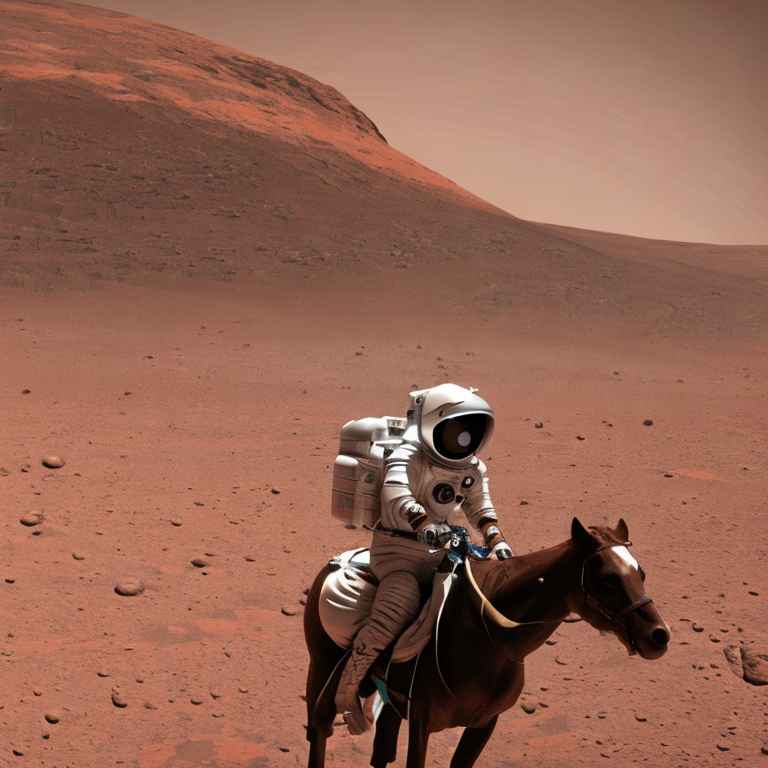

In [9]:

img=generateimage(myprompt)

In [18]:
betterprompt=generateprompt(myprompt)

 ##a photo of an astronaut riding a horse on mars##

"""

import os
import


In [ ]:
betterimg=generateimage(betterprompt)